In [1]:
import pandas as pd
import sys
sys.path.append('../scripts')

In [2]:
import pandas as pd
from feature_engineering import compute_customer_metrics, extract_transaction_features, encode_categorical_columns, scale_numerical_columns
from Default_estimator_WoE import calculate_rfms, create_default_estimator, visualize_rfms, woe_binning


In [3]:
df = pd.read_csv('../data/data.csv')

In [4]:
aggregate_features = compute_customer_metrics(df)
aggregate_features.head()

,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,TransactionStdDev
CustomerId,,,,
CustomerId_1,-10000.0,-10000.000000,1,NaN
CustomerId_10,-10000.0,-10000.000000,1,NaN
CustomerId_1001,20000.0,4000.000000,5,6558.963333
CustomerId_1002,4225.0,384.090909,11,560.498966
CustomerId_1003,20000.0,3333.333333,6,6030.478146


In [5]:
merged_df = pd.merge(df, aggregate_features , on = 'CustomerId')

In [6]:
df = merged_df
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,TransactionStdDev
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0,109921.75,923.712185,119,3042.294251
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,109921.75,923.712185,119,3042.294251
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,1000.00,500.000000,2,0.000000
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0,228727.20,6019.136842,38,17169.241610
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0,228727.20,6019.136842,38,17169.241610


In [7]:
extracted_features = extract_transaction_features(df)
extracted_features.head()

,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
0,2,15,11,2018
1,2,15,11,2018
2,2,15,11,2018
3,3,15,11,2018
4,3,15,11,2018


In [8]:
columns_to_one_hot_encode = ["CurrencyCode", "ProviderId", "ProductId", "ProductCategory", "ChannelId"]

# Apply One-Hot Encoding to specified columns
encoded_df = encode_categorical_columns(df, columns_to_one_hot_encode, encoding_type='onehot')
print("One-Hot Encoded DataFrame:")
print(encoded_df)


One-Hot Encoded DataFrame:
              TransactionId         BatchId       AccountId  \
0       TransactionId_76871   BatchId_36123  AccountId_3957   
1       TransactionId_73770   BatchId_15642  AccountId_4841   
2       TransactionId_26203   BatchId_53941  AccountId_4229   
3         TransactionId_380  BatchId_102363   AccountId_648   
4       TransactionId_28195   BatchId_38780  AccountId_4841   
...                     ...             ...             ...   
95657   TransactionId_89881   BatchId_96668  AccountId_4841   
95658   TransactionId_91597    BatchId_3503  AccountId_3439   
95659   TransactionId_82501  BatchId_118602  AccountId_4841   
95660  TransactionId_136354   BatchId_70924  AccountId_1346   
95661   TransactionId_35670   BatchId_29317  AccountId_4841   

            SubscriptionId       CustomerId  CountryCode   Amount  Value  \
0       SubscriptionId_887  CustomerId_4406          256   1000.0   1000   
1      SubscriptionId_3829  CustomerId_4406          256    -20.

In [9]:
df = scale_numerical_columns(df,  ["Amount", "Value","TotalTransactionAmount", "AverageTransactionAmount", "TransactionCount", "TransactionStdDev" ], "normalize")

In [14]:
df = calculate_rfms(df)

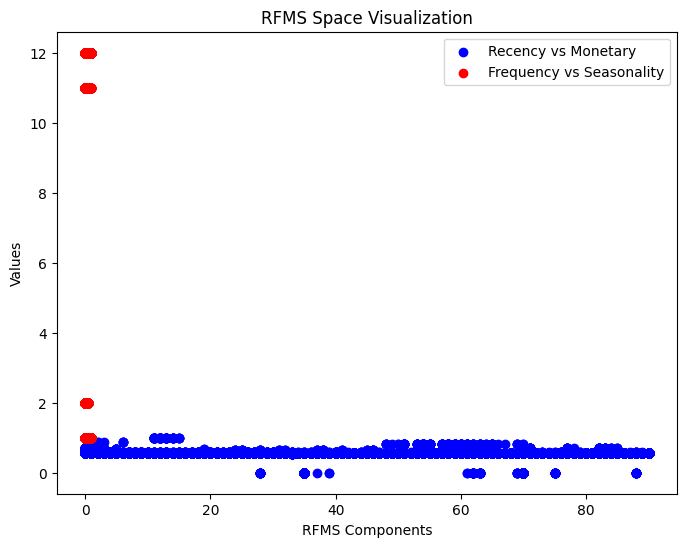

In [15]:
# Visualize RFMS space
visualize_rfms(df)

In [16]:
# Assign clusters and labels based on normalized RFMS features
df = create_default_estimator(df)

In [17]:
# Perform WoE binning on 'TotalTransactionAmount'
df = woe_binning(df, 'Label', 'TotalTransactionAmount')

c:\Users\Kalea\Desktop\kifiya ai mastry\week 6\Credit_Scoring_Project\notebook\../scripts\Default_estimator_WoE.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bin')


In [18]:
# Save cleaned and feature-engineered data
df.to_csv("../data/cleaned_data.csv", index=False)

In [25]:
# Display resulting dataframe with calculated RFMS, Labels, and WoE
df[['TransactionId', 'RFMS_Score', 'Label', 'WoE']].head(20)

,TransactionId,RFMS_Score,Label,WoE
0,TransactionId_76871,101.586373,Good,-0.236869
1,TransactionId_73770,101.586373,Good,-0.236869
2,TransactionId_26203,101.557188,Good,-0.017607
3,TransactionId_380,101.567199,Good,0.173025
4,TransactionId_28195,101.567199,Good,0.173025
5,TransactionId_23223,101.556949,Good,-0.017607
6,TransactionId_118063,101.564280,Good,-0.236869
7,TransactionId_100640,101.564280,Good,-0.236869
8,TransactionId_51905,101.557714,Good,-0.017607
9,TransactionId_130161,101.558478,Good,-0.204140
